In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('db.csv')

In [6]:
data.head(1)

,Отметка времени,Имя/Никнейм,Пол,Возраст,Максимальный рейтинг в Доте,Рейтинг в доте на данный момент,Количество часов в игре (хотя бы примерное),Какое количество игр в среднем ты играешь в неделю?,"У меня ухудшается настроение, если я долго не играю в Доту 2",Почти все свое свободное время я трачу на Доту 2,...,У меня есть конкретная цель - апнуть птсы (например: взять 6к mmr или медаль властелина/дивайна/титана),"Я играю в доту для того, чтобы побеждать",В доте слишком многое зависит не от меня и моей игры,"Если я проигрываю, то это чаще всего связано с плохой игрой тиммейтов","Если бы у меня была сильная команда в каждой игре, я бы почти не проигрывал","Мой возможный птс намного больше, чем мой актуальный",Я долгое время сижу на одном и том же рейтинге без видимого прогресса,"У меня часто пропадает желание играть, когда мои тиммейты играют плохо","MMR - это всего лишь цифра, она не показывает реальный скилл игрока","Напиши трех героев, на которых у тебя сыграно больше всего игр, количество и винрейт на этих персонажах (например: Пудж, 152 игры, 56%):"
0,2021/11/07 5:29:50 PM GMT+3,Серегга,М,26,5300,4800,5000,NaN,4,3,...,3,1,3,1,3,4,NaN,4,4,Феникс - 774 (56%)\nPudge - 146 (45%)\nSpirit ...


In [9]:
data_row = data.iloc[:, 3:-1]
data_row['Максимальный рейтинг в Доте'] = data_row['Максимальный рейтинг в Доте'].str.extract('(\d+)', expand=False)
data_row['Рейтинг в доте на данный момент'] = data_row['Рейтинг в доте на данный момент'].str.extract('(\d+)', expand=False)
data_row['Количество часов в игре (хотя бы примерное)'] = data_row['Количество часов в игре (хотя бы примерное)'].str.extract('(\d+)', expand=False)
data_row['Какое количество игр в среднем ты играешь в неделю? '] = data_row['Какое количество игр в среднем ты играешь в неделю? '].str.extract('(\d+)', expand=False)
data_row['Возраст'] = data_row['Возраст'].str.extract('(\d+)', expand=False)
df = data_row.fillna(0)
df = df.replace(to_replace = 0, value = 0)
df = df.dropna()
df = df.astype('float32')
df = df.drop(np.where(df['Рейтинг в доте на данный момент'] > 12000)[0])
df = df.drop(np.where(df['Максимальный рейтинг в Доте'] > 12000)[0])
df = df.loc[df['Рейтинг в доте на данный момент'] > 100]
df = df.loc[df['Максимальный рейтинг в Доте'] > 100]
df = df.loc[df['Количество часов в игре (хотя бы примерное)'] > 100]
df = df.loc[df['Рейтинг в доте на данный момент'] <= df['Максимальный рейтинг в Доте']]
df = df.loc[df['Количество часов в игре (хотя бы примерное)'] < 40000]
df = df.astype('float32')
df = df.drop('Максимальный рейтинг в Доте',axis=1)

In [10]:
df

,Возраст,Рейтинг в доте на данный момент,Количество часов в игре (хотя бы примерное),Какое количество игр в среднем ты играешь в неделю?,"У меня ухудшается настроение, если я долго не играю в Доту 2",Почти все свое свободное время я трачу на Доту 2,"Я часто играю больше, чем нужно, так как не могу остановиться (регаю новую игру)","Когда я играю в Доту я полностью над ней сосредоточен (не играю ""фо фан"")","С каждой неделей/месяцем я провожу в Доте все больше времени, чем раньше","Я часто регаю некст игру несмотря на дискомфорт (я могу играть голодный, не выспавшийся, в плохом самочувствии и т.д.)",...,"Я могу ливнуть из игры/встать в амулет, если что-то идет не так",У меня есть конкретная цель - апнуть птсы (например: взять 6к mmr или медаль властелина/дивайна/титана),"Я играю в доту для того, чтобы побеждать",В доте слишком многое зависит не от меня и моей игры,"Если я проигрываю, то это чаще всего связано с плохой игрой тиммейтов","Если бы у меня была сильная команда в каждой игре, я бы почти не проигрывал","Мой возможный птс намного больше, чем мой актуальный",Я долгое время сижу на одном и том же рейтинге без видимого прогресса,"У меня часто пропадает желание играть, когда мои тиммейты играют плохо","MMR - это всего лишь цифра, она не показывает реальный скилл игрока"
0,26.0,4800.0,5000.0,0.0,4.0,3.0,1.0,4.0,1.0,1.0,...,1.0,3.0,1.0,3.0,1.0,3.0,4.0,0.0,4.0,4.0
1,21.0,960.0,2808.0,6.0,1.0,2.0,1.0,4.0,2.0,3.0,...,2.0,1.0,2.0,2.0,2.0,3.0,5.0,1.0,3.0,5.0
3,19.0,2130.0,4500.0,20.0,3.0,4.0,5.0,4.0,1.0,5.0,...,1.0,5.0,5.0,5.0,2.0,5.0,3.0,3.0,5.0,5.0
4,15.0,2400.0,700.0,20.0,1.0,3.0,3.0,3.0,2.0,1.0,...,4.0,5.0,5.0,2.0,2.0,5.0,5.0,2.0,2.0,3.0
5,17.0,4320.0,2600.0,20.0,4.0,4.0,5.0,5.0,3.0,3.0,...,1.0,5.0,5.0,2.0,3.0,4.0,3.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7886,18.0,1480.0,1400.0,11.0,5.0,2.0,3.0,3.0,2.0,3.0,...,3.0,2.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,2.0
7887,15.0,130.0,506.0,30.0,2.0,4.0,5.0,5.0,3.0,1.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,3.0,5.0
7888,18.0,2100.0,3600.0,20.0,1.0,1.0,2.0,4.0,3.0,4.0,...,1.0,4.0,5.0,1.0,1.0,3.0,5.0,4.0,3.0,4.0
7889,20.0,3900.0,6400.0,30.0,2.0,5.0,2.0,2.0,2.0,4.0,...,2.0,4.0,4.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0


Данный датасет представляет из себя ответы опросника с канала https://www.youtube.com/c/sereGGa.

# EDA - Анализ Данных

Рассмотрим распределение целевой переменной(MMR)

Text(0, 0.5, 'Количество')

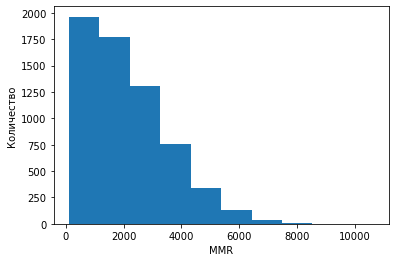

In [19]:
import matplotlib.pyplot as plt
feature = "Рейтинг в доте на данный момент"
ax = df[feature].plot.hist()
ax.set_xlabel("MMR")
ax.set_ylabel("Количество")

In [18]:
print("Средний ммр по выборке: ", df[feature].mean())
print("Медианный ммр по выборке: ", df[feature].median())

Средний ммр по выборке:  2113.03271484375
Медианный ммр по выборке:  1900.0


Распределение количества часов в игре Dota 2

Text(0, 0.5, 'Количество')

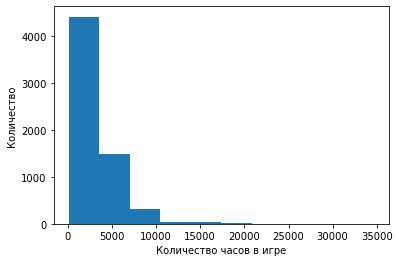

In [20]:
feature = "Количество часов в игре (хотя бы примерное)"
ax = df[feature].plot.hist()
ax.set_xlabel("Количество часов в игре")
ax.set_ylabel("Количество")

In [21]:
print("Средний кол-во часов по выборке: ", df[feature].mean())
print("Медианный кол-во часов по выборке: ", df[feature].median())

Средний кол-во часов по выборке:  3071.323974609375
Медианный кол-во часов по выборке:  2300.0


Text(0, 0.5, 'Количество')

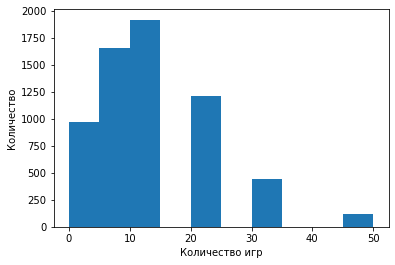

In [24]:
feature = "Какое количество игр в среднем ты играешь в неделю? "
ax = df[feature].plot.hist()
ax.set_xlabel("Количество игр")
ax.set_ylabel("Количество")

Распределение ответов на вопросы

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<Ax

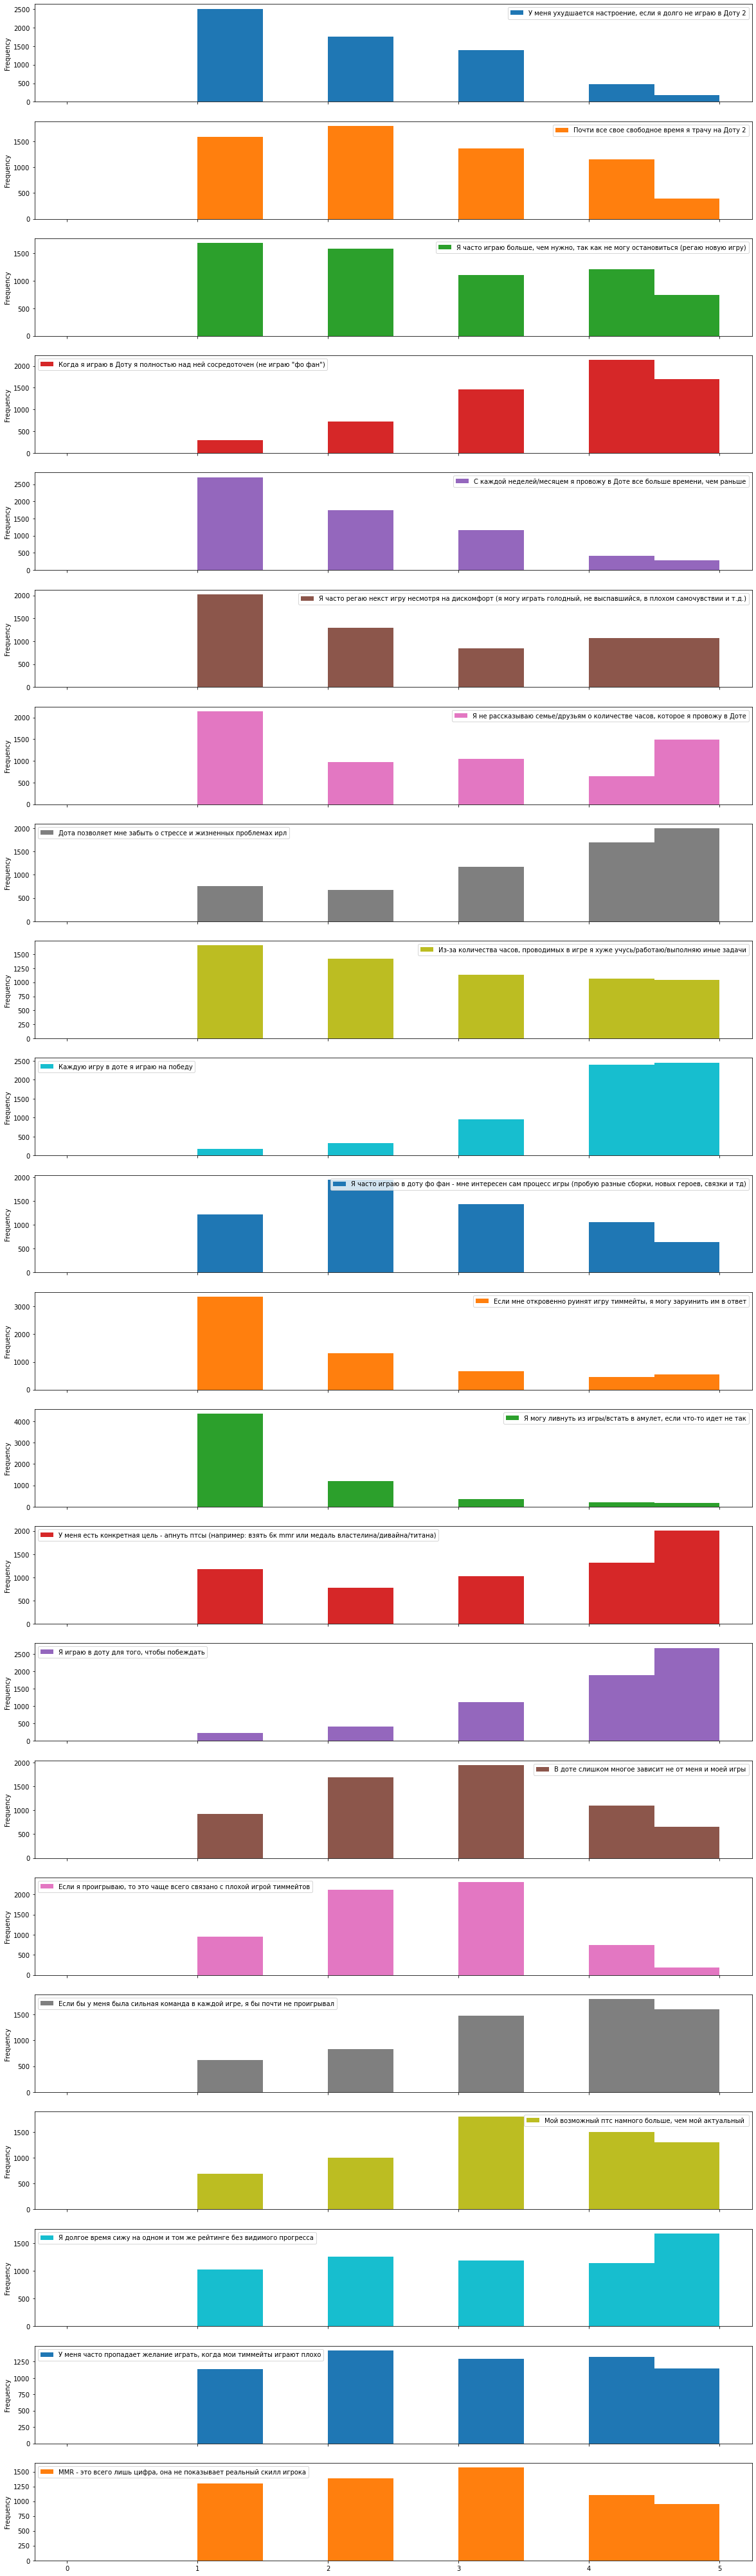

In [98]:
df.iloc[:,4:26].plot(kind = 'hist',figsize=(20,100),subplots=True, layout = (30,1))

Построим корр матрицу

In [104]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Koche\AppData\Local\Temp/ipykernel_14104/2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Возраст,Рейтинг в доте на данный момент,Количество часов в игре (хотя бы примерное),Какое количество игр в среднем ты играешь в неделю?,"У меня ухудшается настроение, если я долго не играю в Доту 2",Почти все свое свободное время я трачу на Доту 2,"Я часто играю больше, чем нужно, так как не могу остановиться (регаю новую игру)","Когда я играю в Доту я полностью над ней сосредоточен (не играю ""фо фан"")","С каждой неделей/месяцем я провожу в Доте все больше времени, чем раньше","Я часто регаю некст игру несмотря на дискомфорт (я могу играть голодный, не выспавшийся, в плохом самочувствии и т.д.)","Я не рассказываю семье/друзьям о количестве часов, которое я провожу в Доте",Дота позволяет мне забыть о стрессе и жизненных проблемах ирл,"Из-за количества часов, проводимых в игре я хуже учусь/работаю/выполняю иные задачи",Каждую игру в доте я играю на победу,"Я часто играю в доту фо фан - мне интересен сам процесс игры (пробую разные сборки, новых героев, связки и тд)","Если мне откровенно руинят игру тиммейты, я могу заруинить им в ответ","Я могу ливнуть из игры/встать в амулет, если что-то идет не так",У меня есть конкретная цель - апнуть птсы (например: взять 6к mmr или медаль властелина/дивайна/титана),"Я играю в доту для того, чтобы побеждать",В доте слишком многое зависит не от меня и моей игры,"Если я проигрываю, то это чаще всего связано с плохой игрой тиммейтов","Если бы у меня была сильная команда в каждой игре, я бы почти не проигрывал","Мой возможный птс намного больше, чем мой актуальный",Я долгое время сижу на одном и том же рейтинге без видимого прогресса,"У меня часто пропадает желание играть, когда мои тиммейты играют плохо","MMR - это всего лишь цифра, она не показывает реальный скилл игрока"
Возраст,1.00,0.01,0.01,-0.00,-0.01,-0.01,-0.02,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.00,0.01,0.00,-0.01,0.00,-0.02,0.00,0.01,-0.02,-0.00,0.01,-0.02,-0.01
Рейтинг в доте на данный момент,0.01,1.00,0.56,0.10,-0.02,0.03,-0.00,0.14,-0.13,0.00,0.02,0.01,0.04,0.09,-0.13,0.02,0.03,0.06,0.10,-0.02,-0.00,-0.03,-0.07,-0.18,-0.03,-0.16
Количество часов в игре (хотя бы примерное),0.01,0.56,1.00,0.12,-0.00,0.07,0.07,0.06,-0.11,0.06,0.02,0.05,0.06,0.03,-0.06,0.05,0.03,-0.01,0.05,0.03,0.07,-0.02,0.01,0.03,0.00,-0.07
Какое количество игр в среднем ты играешь в неделю?,-0.00,0.10,0.12,1.00,0.21,0.52,0.22,0.15,0.28,0.16,0.03,0.11,0.18,0.10,-0.16,0.08,0.10,0.27,0.17,0.00,0.07,0.07,0.10,-0.08,0.03,-0.07
"У меня ухудшается настроение, если я долго не играю в Доту 2",-0.01,-0.02,-0.00,0.21,1.00,0.32,0.22,0.09,0.25,0.19,0.09,0.19,0.19,0.06,-0.08,0.09,0.09,0.19,0.13,0.06,0.09,0.06,0.09,0.03,0.10,0.00
Почти все свое свободное время я трачу на Доту 2,-0.01,0.03,0.07,0.52,0.32,1.00,0.36,0.16,0.37,0.27,0.12,0.21,0.30,0.13,-0.14,0.10,0.11,0.31,0.20,0.04,0.09,0.09,0.10,-0.00,0.09,-0.06
"Я часто играю больше, чем нужно, так как не могу остановиться (регаю новую игру)",-0.02,-0.00,0.07,0.22,0.22,0.36,1.00,0.07,0.26,0.43,0.16,0.18,0.34,0.02,-0.04,0.12,0.10,0.12,0.09,0.08,0.08,0.07,0.07,0.08,0.15,-0.01
"Когда я играю в Доту я полностью над ней сосредоточен (не играю ""фо фан"")",0.00,0.14,0.06,0.15,0.09,0.16,0.07,1.00,0.16,0.06,0.07,0.10,0.03,0.55,-0.51,-0.10,-0.09,0.40,0.48,-0.02,0.04,0.04,0.09,-0.10,0.01,-0.11
"С каждой неделей/месяцем я провожу в Доте все больше времени, чем раньше",-0.01,-0.13,-0.11,0.28,0.25,0.37,0.26,0.16,1.00,0.22,0.13,0.13,0.21,0.10,-0.09,0.04,0.06,0.24,0.15,0.04,0.04,0.07,0.08,-0.00,0.07,-0.01
"Я часто регаю некст игру несмотря на дискомфорт (я могу играть голодный, не выспавшийся, в плохом самочувствии и т.д.)",-0.01,0.00,0.06,0.16,0.19,0.27,0.43,0.06,0.22,1.00,0.16,0.17,0.29,0.01,-0.06,0.14,0.12,0.12,0.10,0.10,0.09,0.06,0.07,0.11,0.15,-0.01


Проверим на мультиколлинеарность

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  

X = add_constant(df)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                                                                                     83.644635
Возраст                                                                                                                    1.003125
Рейтинг в доте на данный момент                                                                                            1.647887
Количество часов в игре (хотя бы примерное)                                                                                1.561741
Какое количество игр в среднем ты играешь в неделю?                                                                        1.464365
У меня ухудшается настроение, если я долго не играю в Доту 2                                                               1.192402
Почти все свое свободное время я трачу на Доту 2                                                                           1.724449
Я часто играю больше, чем нужно, так как не могу остановиться (регаю новую и

Почти все величины слабо коррелируют между собой, используя коэффицент инфляции дисперсии видно, что не имеет смысла убирать переменные из обучающей выборки

# Тестирование моделей распознавания
Для Target переменной была взято значение "Рейтинг в доте на данны момент"

In [119]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Рейтинг в доте на данный момент'])
y = df['Рейтинг в доте на данный момент']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Линейная регрессия

In [170]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [171]:
reg.score(X_test,y_test)

-0.6807352969003713

In [149]:
reg.predict(X_test)

array([1273.2871, 5234.3994, 1970.2017, ..., 1182.4633, 1505.2053,
       1872.339 ], dtype=float32)

In [155]:
from sklearn.metrics import mean_absolute_error
print("MAE:", mean_absolute_error(y_test, reg.predict(X_test)))

MAE: 908.48676


### MAE ошибка для тестовых данных линейной регрессии составляет 908

## DecisionTreeRegressor

In [176]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(random_state=42)
clf = clf.fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, clf.predict(X_test)))

MAE: 1071.4524564183835


### MAE ошибка для тестовых данных деревьев решений составляет 1071.45

## RandomForestRegressor

In [201]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [202]:
print("MAE:", mean_absolute_error(y_test, regr.predict(X_test)))

MAE: 768.5607052297939


### MAE ошибка для тестовых данных RandomForest составляет 768

## Логистическая регрессия

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)  # apply scaling on training data

print("MAE:", mean_absolute_error(y_test, pipe.predict(X_test)))

MAE: 980.74725


### MAE ошибка для тестовых данных Логистическая регрессия составляет 980

## AdaBoost

In [195]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=42, n_estimators=1)
regr.fit(X, y)
print("MAE:", mean_absolute_error(y_test, regr.predict(X_test)))

MAE: 822.8815165097659


### MAE ошибка для тестовых данных AdaBoost составляет 822.8

## SVR 

In [197]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

svr = SVR()
distributions = dict(C=uniform(loc=0, scale=4),
                        epsilon=uniform(loc=0, scale=4))
clf = RandomizedSearchCV(svr, distributions, random_state=42)

search = clf.fit(X_train, y_train)

In [198]:
print("MAE:", mean_absolute_error(y_test, search.predict(X_test)))

MAE: 874.8450030551518


### MAE ошибка для тестовых данных AdaBoost составляет 874.84

## Из данных тестов лучшим алгоритом предсказания является RandomForrest с MAE ошибкой: 768